In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
img=cv2.imread('./model/test_images/Ronaldo1.jpeg')
img.shape

(249, 203, 3)

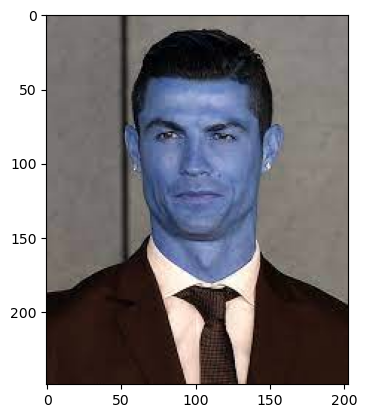

In [5]:
plt.imshow(img)

In [6]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(249, 203)

In [7]:
gray

array([[119, 121, 123, ..., 134, 134, 134],
       [116, 118, 121, ..., 134, 134, 134],
       [112, 115, 118, ..., 134, 134, 134],
       ...,
       [ 21,  23,  26, ...,  23,  23,  23],
       [ 21,  23,  26, ...,  23,  23,  23],
       [ 23,  23,  24, ...,  23,  23,  23]], dtype=uint8)

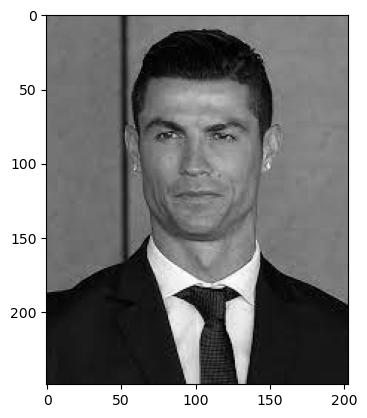

In [8]:
plt.imshow(gray,cmap="gray")

In [9]:
face_cascade=cv2.CascadeClassifier('./model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./model/opencv/haarcascades/haarcascade_eye.xml')

face=face_cascade.detectMultiScale(gray,1.3,5)


In [10]:
(a,b,c,d)=face[0]



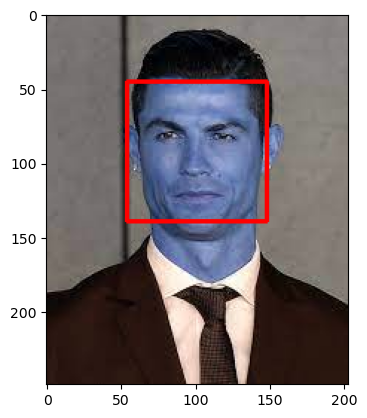

In [11]:



face_img=cv2.rectangle(img,(a,b),(a+c,b+d),(255,0,0),2 )
plt.imshow(face_img)

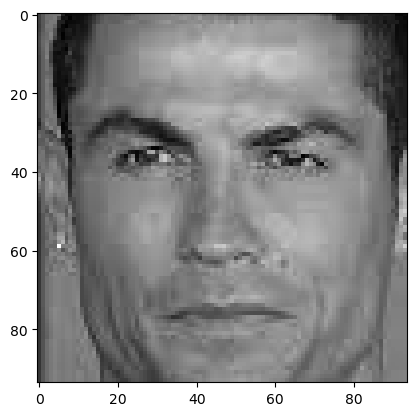

In [12]:
roiGray=gray[b:b+d,a:a+c]
roiColor=face_img[b:b+d,a:a+c]

plt.imshow(roiGray,cmap='gray')


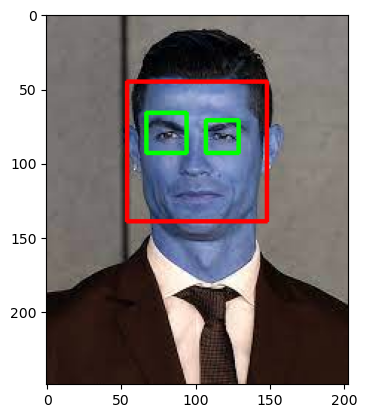

In [13]:
cv2.destroyAllWindows
for (x,y,w,h) in face:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (x2,y2,w2,h2) in eyes:
         cv2.rectangle(roi_color,(x2,y2),(x2+w2,y2+h2),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img,cmap='gray')



In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h, x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color
        

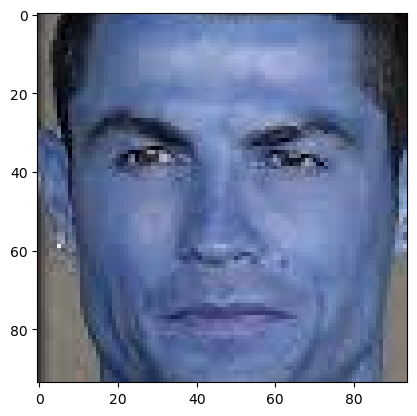

In [15]:
cropped_image=get_cropped_image_if_2_eyes('./model/test_images/Ronaldo1.jpeg')
plt.imshow(cropped_image)

In [16]:
path_to_data="./model/dataset/"
path_to_cr_data="./model/dataset/cropped/"

In [17]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./model/dataset/cropped',
 './model/dataset/Ronaldo',
 './model/dataset/Scholes',
 './model/dataset/Vidic',
 './model/dataset/Beckham',
 './model/dataset/Rooney']

In [18]:
import shutil

if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
for img_dir in img_dirs:
    print(img_dir)

./model/dataset/cropped
./model/dataset/Ronaldo
./model/dataset/Scholes
./model/dataset/Vidic
./model/dataset/Beckham
./model/dataset/Rooney


In [20]:
#inisialisasi set untuk direktori gambar yang sudah di crop
cropped_image_dirs=[]
#key untuk mengumpulkan nama nama file di dalam direktori suatu pemain
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    #memberi nilai ke variable celebrity_name dari hasil split nama folder yang ada di direktori perulagan saat ini
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]=[]
    
    #perulangan untuk mengambil nama nama file yang ada di folder direktori perulangan saat ini
    for entry in os.scandir(img_dir):
        #Mengambil crop an image apabila ada 2 mata yang di ambil dengan mode gambar berwarna seperti default nya, File gambar yang di ambil file perulangan saat ini
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        
        #Apabila gambar mempunyai 2 mata,isi Variabel Cropped Folder dengan path Folder Cropped/NamaPemain
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            #Apabila path Cropped Folder/NamaPemain tidak ada buat folder cropped folder
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                #isi key cropped_image_dirs dengan croped folder
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
    
            #Membuat nama gambar yang sudah di cropped untuk penyimpanan gambar di perulangan saat ini
            cropped_file_name=celebrity_name+ str(count) +".png"
            #membuat nama path untuk gambar yang sudah di cropped 
            cropped_file_path=cropped_folder+"/"+cropped_file_name
        
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1        

cropped
Ronaldo
Generating cropped images in folder:  ./model/dataset/cropped/Ronaldo


Scholes
Generating cropped images in folder:  ./model/dataset/cropped/Scholes
Vidic
Generating cropped images in folder:  ./model/dataset/cropped/Vidic
Beckham
Generating cropped images in folder:  ./model/dataset/cropped/Beckham
Rooney
Generating cropped images in folder:  ./model/dataset/cropped/Rooney


In [21]:
celebrity_file_names_dict.items()

dict_items([('cropped', []), ('Ronaldo', ['./model/dataset/cropped/Ronaldo/Ronaldo1.png', './model/dataset/cropped/Ronaldo/Ronaldo2.png', './model/dataset/cropped/Ronaldo/Ronaldo3.png', './model/dataset/cropped/Ronaldo/Ronaldo4.png', './model/dataset/cropped/Ronaldo/Ronaldo5.png', './model/dataset/cropped/Ronaldo/Ronaldo6.png', './model/dataset/cropped/Ronaldo/Ronaldo7.png', './model/dataset/cropped/Ronaldo/Ronaldo8.png', './model/dataset/cropped/Ronaldo/Ronaldo9.png', './model/dataset/cropped/Ronaldo/Ronaldo10.png', './model/dataset/cropped/Ronaldo/Ronaldo11.png', './model/dataset/cropped/Ronaldo/Ronaldo12.png', './model/dataset/cropped/Ronaldo/Ronaldo13.png', './model/dataset/cropped/Ronaldo/Ronaldo14.png', './model/dataset/cropped/Ronaldo/Ronaldo15.png', './model/dataset/cropped/Ronaldo/Ronaldo16.png', './model/dataset/cropped/Ronaldo/Ronaldo17.png', './model/dataset/cropped/Ronaldo/Ronaldo18.png', './model/dataset/cropped/Ronaldo/Ronaldo19.png', './model/dataset/cropped/Ronaldo/Ron

In [22]:
#membuat set untuk kumpulan Nama nama file gambar
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    #Memasukan nama celebrity lewat split Penamaan Direktori
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Ronaldo': ['./model/dataset/cropped/Ronaldo/Ronaldo2.png',
  './model/dataset/cropped/Ronaldo/Ronaldo106.png',
  './model/dataset/cropped/Ronaldo/Ronaldo4.png',
  './model/dataset/cropped/Ronaldo/Ronaldo65.png',
  './model/dataset/cropped/Ronaldo/Ronaldo78.png',
  './model/dataset/cropped/Ronaldo/Ronaldo98.png',
  './model/dataset/cropped/Ronaldo/Ronaldo55.png',
  './model/dataset/cropped/Ronaldo/Ronaldo43.png',
  './model/dataset/cropped/Ronaldo/Ronaldo72.png',
  './model/dataset/cropped/Ronaldo/Ronaldo52.png',
  './model/dataset/cropped/Ronaldo/Ronaldo61.png',
  './model/dataset/cropped/Ronaldo/Ronaldo66.png',
  './model/dataset/cropped/Ronaldo/Ronaldo39.png',
  './model/dataset/cropped/Ronaldo/Ronaldo70.png',
  './model/dataset/cropped/Ronaldo/Ronaldo87.png',
  './model/dataset/cropped/Ronaldo/Ronaldo16.png',
  './model/dataset/cropped/Ronaldo/Ronaldo67.png',
  './model/dataset/cropped/Ronaldo/Ronaldo11.png',
  './model/dataset/cropped/Ronaldo/Ronaldo80.png',
  './model/dataset/cr

In [23]:
#Memberikan Enumerasi
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Ronaldo': 0, 'Scholes': 1, 'Vidic': 2, 'Beckham': 3, 'Rooney': 4}

In [24]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [25]:
X, y = [], []
#mengambil key dan values dan memberikan nya ke variable celebrty name dan training file
for celebrity_name, training_files in celebrity_file_names_dict.items():
    #menganmbil values nama Alamat File 
    for training_image in training_files:
        #memasukan gambar ke Objek  CV
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        

In [48]:
def transformGambar(pathFile):
    X=[]
    img = cv2.imread(pathFile)
    scalled_raw_img = cv2.resize(img, (32, 32))
    img_har = w2d(img,'db1',5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    X.append(combined_img)
    X = np.array(X).reshape(len(X),4096).astype(float)
    return X

    

In [26]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(237, 4096)

In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6166666666666667

In [51]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79        27
           1       0.50      0.50      0.50         8
           2       0.67      0.22      0.33         9
           3       0.50      0.38      0.43        13
           4       0.33      0.33      0.33         3

    accuracy                           0.62        60
   macro avg       0.54      0.47      0.48        60
weighted avg       0.60      0.62      0.58        60



In [30]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [31]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [32]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.666825,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.571111,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.599206,{'logisticregression__C': 1}


In [33]:
best_estimators['svm'].score(X_test,y_test)
best_clf = best_estimators['svm']

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[25,  1,  1,  0,  0],
       [ 1,  4,  0,  3,  0],
       [ 3,  1,  2,  1,  2],
       [ 7,  1,  0,  5,  0],
       [ 0,  1,  0,  1,  1]])

Text(95.72222222222221, 0.5, 'Truth')

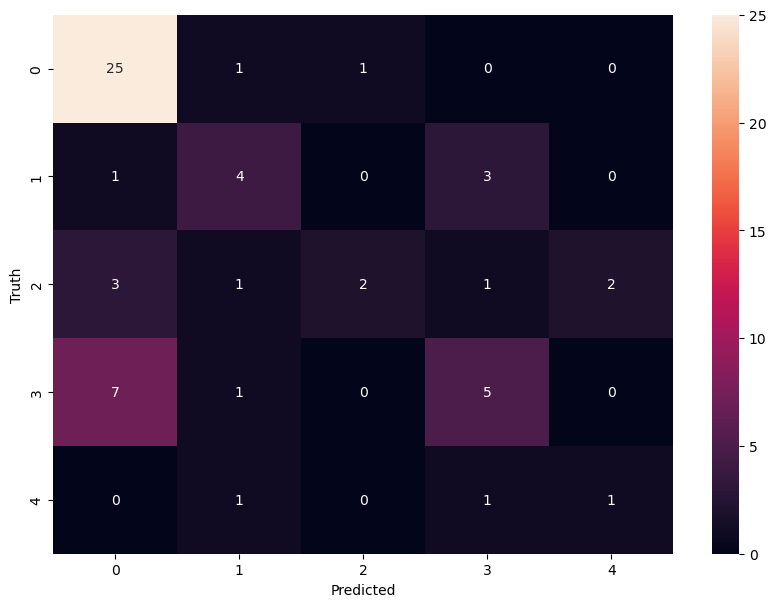

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
%pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Note: you may need to restart the kernel to use updated packages.


['saved_model.pkl']

In [37]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [69]:
pipe.predict(transformGambar("./model/dataset/cropped/Rooney/Rooney1.png"))

array([4])